In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


sns.set()

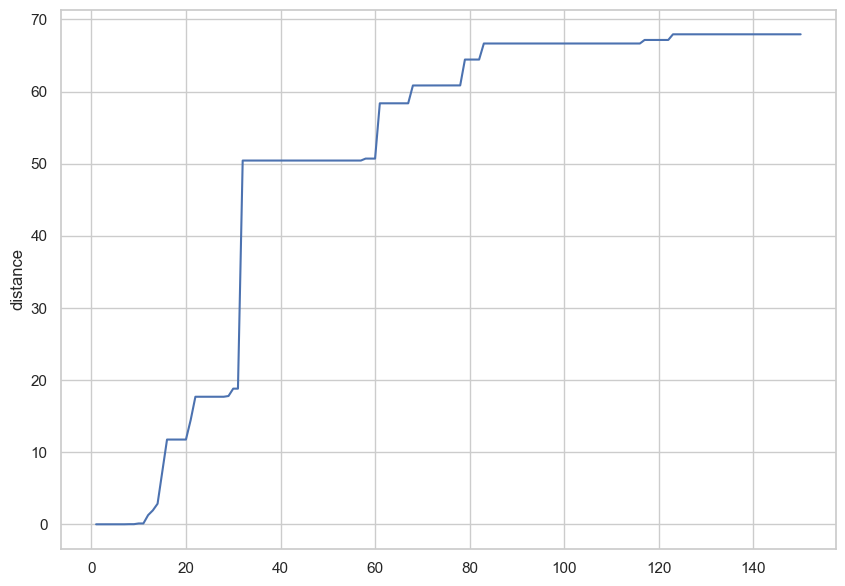

In [29]:
plt.figure(figsize=(10, 7))

data = {"distance": []}

for i in range(1, 151):
    with open(f"../framspy/lab7/init_start/{i}.gen") as file:
        best_distance = 0
        for line in file:
            if line.startswith("0:"):
                best_distance = max(best_distance, float(line.split(':')[1]))
        data["distance"].append(best_distance)   

df = pd.DataFrame(data)

sns.lineplot(df, x=range(1, 151), y="distance")
plt.show()

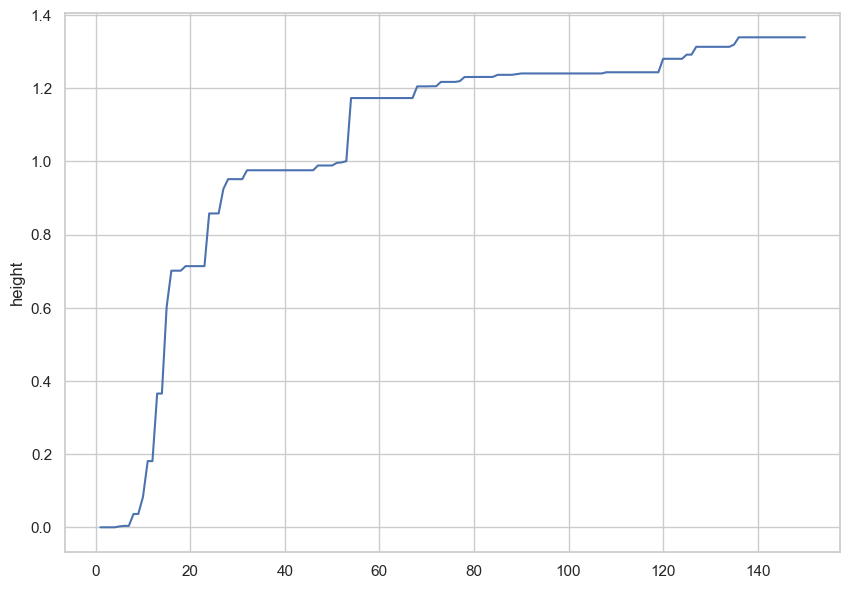

In [27]:
plt.figure(figsize=(10, 7))

data = {"height": []}

for i in range(1, 151):
    with open(f"../framspy/lab7/init_start/{i}.gen") as file:
        best_distance = 0
        for line in file:
            if line.startswith("1:"):
                best_distance = max(best_distance, float(line.split(':')[1]))
        data["height"].append(best_distance)   

df = pd.DataFrame(data)

sns.lineplot(df, x=range(1, 151), y="height")
plt.show()

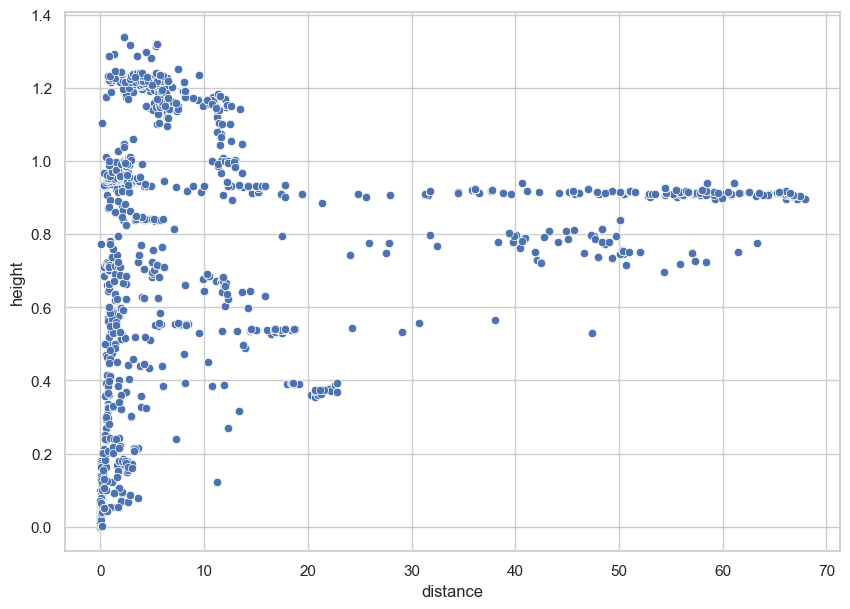

In [31]:
plt.figure(figsize=(10, 7))

data = {"distance": [], "height": []}

for i in range(1, 151):
    with open(f"../framspy/lab7/init_start/{i}.gen") as file:
        for line in file:
            if line.startswith("0:"):
                value = float(line.split(':')[1])
                data["distance"].append(value)
            if line.startswith("1:"):
                value = float(line.split(':')[1])
                data["height"].append(value)

df = pd.DataFrame(data)

sns.scatterplot(df, x="distance", y="height")
plt.show()

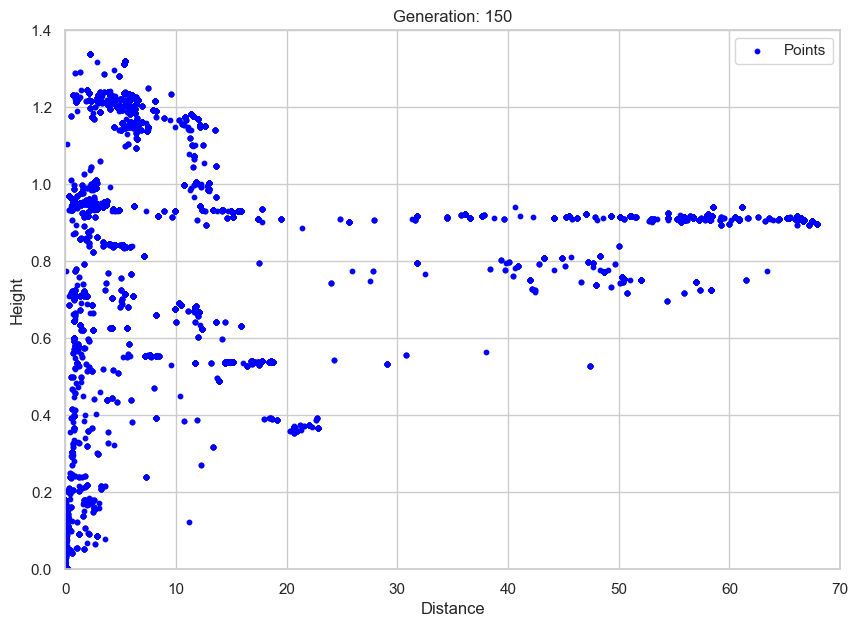

In [33]:
# Initialize an empty dictionary for the data
data = {"distance": [], "height": []}

# Function to read data for a given frame
def read_frame_data(frame):
    with open(f"../framspy/lab7/init_start/{frame}.gen") as file:
        for line in file:
            if line.startswith("0:"):
                data["distance"].append(float(line.split(':')[1]))
            if line.startswith("1:"):
                data["height"].append(float(line.split(':')[1]))


# Set up the figure
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(style="whitegrid")
scat = ax.scatter([], [], s=10, color='blue', label='Points')

# Set plot limits (adjust based on your data range if needed)
ax.set_xlim(0, 70)  # Replace with your actual data limits
ax.set_ylim(0, 1.4)  # Replace with your actual data limits
ax.set_xlabel("Distance")
ax.set_ylabel("Height")
ax.legend()

# Update function for animation
def update(frame):
    read_frame_data(frame + 1)  # Read the data for the current frame
    df = pd.DataFrame(data)    # Convert updated data to a DataFrame
    scat.set_offsets(df[['distance', 'height']].values)  # Update scatter points
    ax.set_title(f"Generation: {frame + 1}")  # Update the title with the current frame number
    return scat, ax.title  # Return updated elements

# Create the animation
ani = FuncAnimation(fig, update, frames=150, interval=100, blit=True)

# Show the animation
ani.save("animation_all.gif", writer="pillow")
plt.show()

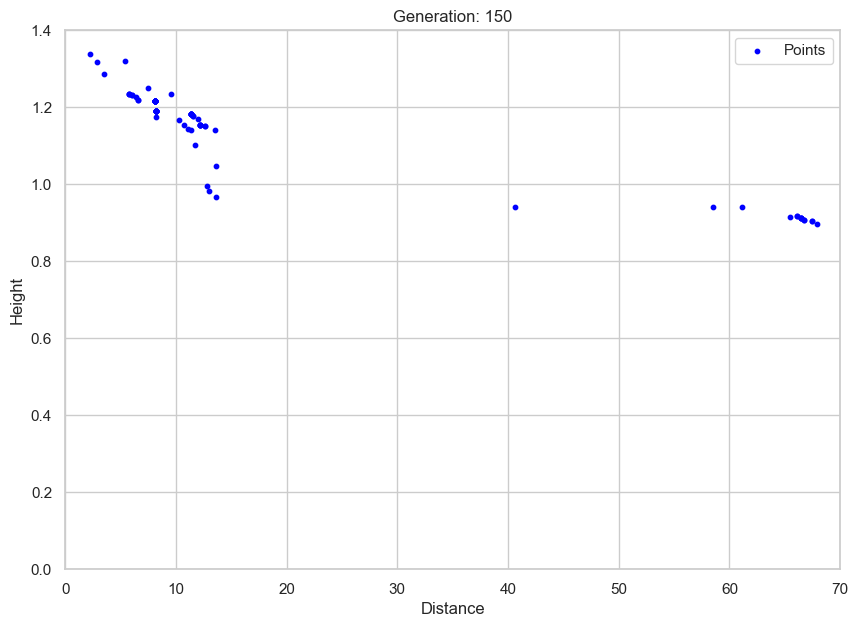

In [37]:
# import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Initialize an empty dictionary for the data
data = {"distance": [], "height": []}

# Function to read data for a given frame
def read_frame_data(frame):
    data = {"distance": [], "height": []}
    with open(f"../framspy/lab7/init_start/{frame}.gen") as file:
        for line in file:
            if line.startswith("0:"):
                data["distance"].append(float(line.split(':')[1]))
            if line.startswith("1:"):
                data["height"].append(float(line.split(':')[1]))

    return data

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(style="whitegrid")
scat = ax.scatter([], [], s=10, color='blue', label='Points')

# Set plot limits (adjust based on your data range if needed)
ax.set_xlim(0, 70)  # Replace with your actual data limits
ax.set_ylim(0, 1.4)  # Replace with your actual data limits
ax.set_xlabel("Distance")
ax.set_ylabel("Height")
ax.legend()

# Update function for animation
def update(frame):
    data = read_frame_data(frame + 1)  # Read the data for the current frame
    df = pd.DataFrame(data)    # Convert updated data to a DataFrame
    scat.set_offsets(df[['distance', 'height']].values)  # Update scatter points
    ax.set_title(f"Generation: {frame + 1}")  # Update the title with the current frame number
    return scat, ax.title  # Return updated elements

# Create the animation
ani = FuncAnimation(fig, update, frames=150, interval=100, blit=True)

# Show the animation
ani.save("animation_generation.gif", writer="pillow")
plt.show()